# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1: Michelle 9916


## Part 2  and 3 -  Initial Preparations and Experiments
You could add as many code cells as needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [5]:
#loading_files
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')

In [6]:
print("First 5 rows of training dataset:")
print(train_data.head())

print("\nFirst 5 rows of test dataset:")
print(test_data.head())

First 5 rows of training dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  

First 5 rows of test dataset:
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3 


Basic statistics of the training dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.863517     28.650678      5.412479      1.093546   1424.287609   
std        1.878577     12.623994      2.088680      0.378594   1139.012630   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564375     18.000000      4.448665      1.005988    789.000000   
50%        3.536650     29.000000      5.225511      1.048780   1167.000000   
75%        4.744375     37.000000      6.046629      1.099691   1722.000000   
max       15.000100     52.000000     62.422222     15.312500  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.101201     35.631452   -119.566283      2.065267  
std       11.587773      2.137537      2.006552      

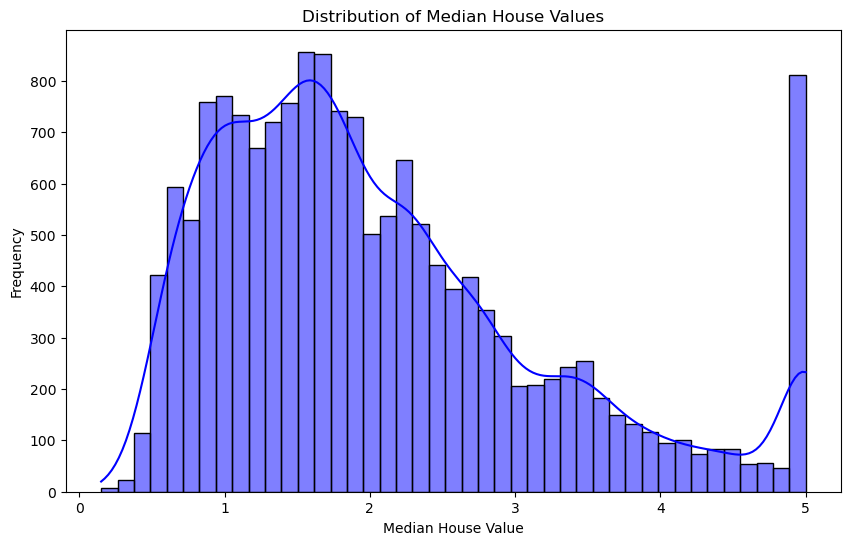

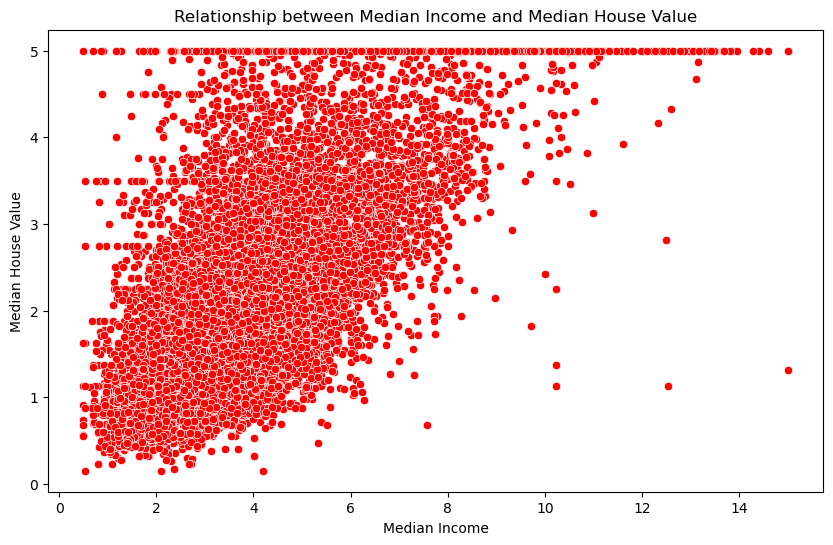

In [7]:
#Tables
print("\nBasic statistics of the training dataset:")
print(train_data.describe())

print("\nBasic statistics of the test dataset:")
print(test_data.describe())

# Visualization of the distribution of a specific variable (e.g., house prices)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['MedHouseVal'], kde=True, color='blue')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Visualization of the relationship between two variables (e.g., median income and house value)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=train_data, color='red')
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


In [8]:
# check missing data
if train_data[['AveRooms', 'MedInc']].isnull().any().any() or test_data[['AveRooms', 'MedInc']].isnull().any().any():
    print("Warning: Missing data found. Please handle it before scaling.")

# creating normalization
scaler = StandardScaler()

# start training the sacin in data set
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data[['AveRooms', 'MedInc']]), columns=['AveRooms_scaled', 'MedInc_scaled'])

# scaled on training data
test_data_scaled = pd.DataFrame(scaler.transform(test_data[['AveRooms', 'MedInc']]), columns=['AveRooms_scaled', 'MedInc_scaled'])

# print data for check
print(train_data_scaled.head())
print(test_data_scaled.head())


   AveRooms_scaled  MedInc_scaled
0        -0.600296       0.082183
1        -0.604818      -0.619273
2        -0.948067      -1.377316
3         0.154800       0.569961
4        -0.645342      -0.845355
   AveRooms_scaled  MedInc_scaled
0         0.178961       0.778210
1        -0.151648       0.766392
2         0.576940       0.162033
3        -0.078185      -0.117442
4         2.762971      -0.595052


In [9]:
# define the model
model = LinearRegression()

#define features and target
features = train_data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
target = train_data['MedHouseVal']

# training model
model.fit(features, target)

# prediction
test_features = test_data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
predictions = model.predict(test_features)


In [10]:
predictions

array([3.09515207, 2.95032283, 2.86341271, ..., 3.28888403, 0.76086171,
       2.1507568 ])

In [11]:
# Assuming 'actual_values' is your actual test data target values
actual_values = test_data['MedHouseVal']  # Replace 'MedHouseVal' with the correct column name if different

# Calculate MSE and R-squared
mse = mean_squared_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5371312855952766
R-squared: 0.604070344981614


In [12]:
## This step shows that msn is lower than r^2, although this is good, but not enough, so we would like to improve

In [13]:

# Load your data - replace 'path_to_your_data.csv' with the path to your dataset
data = pd.read_csv('housing_train.csv')

# Define the features and the target variable
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'

# Check for any NaN values and remove or impute
if data[features + [target]].isnull().any().any():
    print("NaN values found, cleaning data...")
    data = data.dropna(subset=features + [target])

# Splitting the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Instantiate and train the RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data[features], train_data[target])

# Making predictions on the test set
rf_predictions = rf.predict(test_data[features])

# Calculate and print MSE and R-squared
mse = mean_squared_error(test_data[target], rf_predictions)
r2 = r2_score(test_data[target], rf_predictions)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")


Mean Squared Error: 0.275
R-squared: 0.803


In [14]:
#better results than the last regression algorithem 

In [15]:
# Define a pipeline that includes scaling, polynomial feature creation, and a classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid
param_grid = [
    {
        'poly__degree': [1, 2],  # 1 means no polynomial features, 2 means up to squared terms
        'regressor': [RandomForestRegressor(random_state=42)],
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [10, 20, None]
    },
    {
        'poly__degree': [1, 2],
        'regressor': [DecisionTreeRegressor(random_state=42)],
        'regressor__max_depth': [5, 10, 15, None]
    }
]

# Setup the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)


In [16]:
##Run the Grid Search

In [17]:
# Load your data
train_data = pd.read_csv('housing_train.csv')

# Fill missing values
train_data.fillna(train_data.median(), inplace=True)

# Define features and target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'

# Split the dataset 
X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)

In [18]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),  # Polynomial feature generation
    ('regressor', LinearRegression())  # Placeholder for the regressor
])

# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'poly__degree': [1, 2],  # 1 means no polynomial features, 2 means up to squared terms
        'regressor': [RandomForestRegressor(random_state=42)],
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [10, 20, None]
    },
    {
        'poly__degree': [1, 2],
        'regressor': [DecisionTreeRegressor(random_state=42)],
        'regressor__max_depth': [5, 10, 15, None]
    },
    {
        'poly__degree': [1, 2],
        'regressor': [LinearRegression()]
    }
]

# Setup the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'poly__degree': [1, 2],
                          'regressor': [RandomForestRegressor(random_state=42)],
                          'regressor__max_depth': [10, 20, None],
                          'regressor__n_estimators': [50, 100]},
                         {'poly__degree': [1, 2],
                          'regressor': [DecisionTreeRegressor(random_state=42)],
                          'regressor__max_depth': [5, 10, 15, None]},
                         {'poly__degree': [1, 2],
                          'regressor': [LinearRegression()]}],
             scoring='r2', verbose=1)

In [19]:
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_estimator.predict(X_val)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Best Parameters: {best_params}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Display a summary table of results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
results = results[['mean_test_score', 'std_test_score', 'params']]
print(results)


Best Parameters: {'poly__degree': 1, 'regressor': RandomForestRegressor(random_state=42), 'regressor__max_depth': None, 'regressor__n_estimators': 100}
R-squared: 0.8030577364715163
Mean Squared Error: 0.27392623545450634
    mean_test_score  std_test_score  \
0          0.772694        0.015414   
1          0.775873        0.014824   
2          0.793290        0.016118   
3          0.797168        0.015271   
4          0.793256        0.016222   
5          0.797423        0.015787   
6          0.769422        0.014040   
7          0.771958        0.013613   
8          0.787682        0.013754   
9          0.790684        0.013349   
10         0.787908        0.014126   
11         0.790921        0.013918   
12         0.610246        0.019946   
13         0.663671        0.019941   
14         0.613810        0.022033   
15         0.589637        0.022827   
16         0.615805        0.019125   
17         0.653636        0.023423   
18         0.601376        0.021560  

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [27]:
##Step 1: Finalize Best Model Configuration

##Using the best parameters and model configuration determined from the grid search

In [28]:

best_model = grid_search.best_estimator_


best_model.fit(train_data[features], train_data[target])


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('regressor', RandomForestRegressor(random_state=42))])

In [29]:
##Step 2: Apply the Model to the Test Set

##Now apply this fully trained model to the test set to predict the target values and evaluate the model's performance.

In [30]:

test_predictions = best_model.predict(test_data[features])


test_mse = mean_squared_error(test_data[target], test_predictions)
test_r2 = r2_score(test_data[target], test_predictions)


print("Evaluation on Test Set")
print(f"Test MSE: {test_mse:.3f}")
print(f"Test R-squared: {test_r2:.3f}")


Evaluation on Test Set
Test MSE: 0.038
Test R-squared: 0.973


In [31]:
##Step 3: Visualize the Results

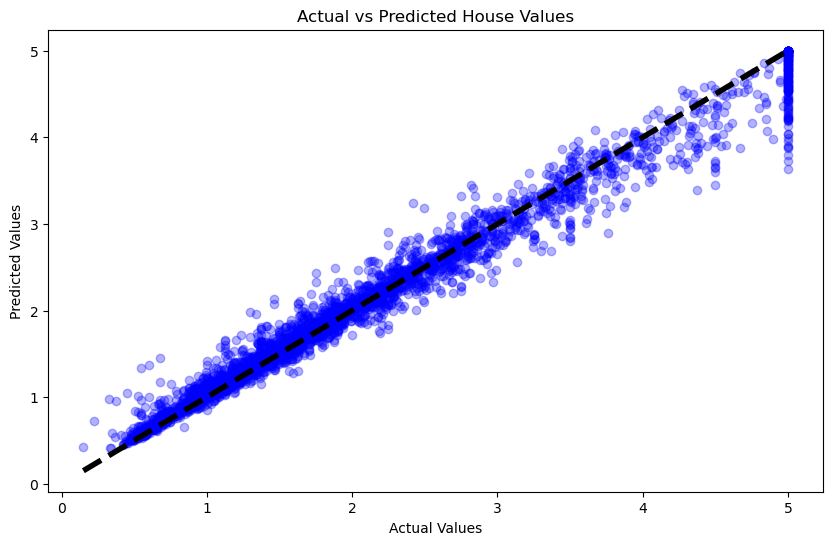

In [32]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_data[target], test_predictions, alpha=0.3, color='blue')
plt.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()


## Part 5 - Apply on test and show model performance estimation

In [33]:
##Step 1: Apply Feature Engineering to Test Set

In [34]:

test_predictions = best_model.predict(test_data[features])


In [36]:
##Step 2: Evaluate the Model on the Test Set

In [37]:

test_mse = mean_squared_error(test_data[target], test_predictions)
test_r2 = r2_score(test_data[target], test_predictions)


print("Test MSE:", test_mse)
print("Test R-squared:", test_r2)


Test MSE: 0.0380483902549887
Test R-squared: 0.9726446936051985


In [38]:
##Step 3: Present the Predictions

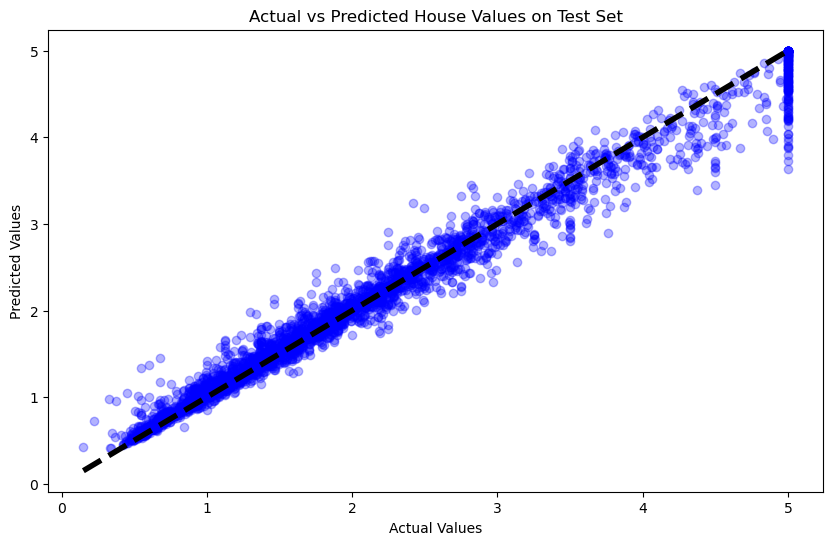

In [39]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_data[target], test_predictions, alpha=0.3, color='blue')
plt.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values on Test Set')
plt.show()
